<a href="https://colab.research.google.com/github/MaxwellPaparelli/Machine_Learning/blob/main/Fraude_em_Cart%C3%A3o_de_Credito_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning para Detecção de Fraudes em Cartão de Crédito


 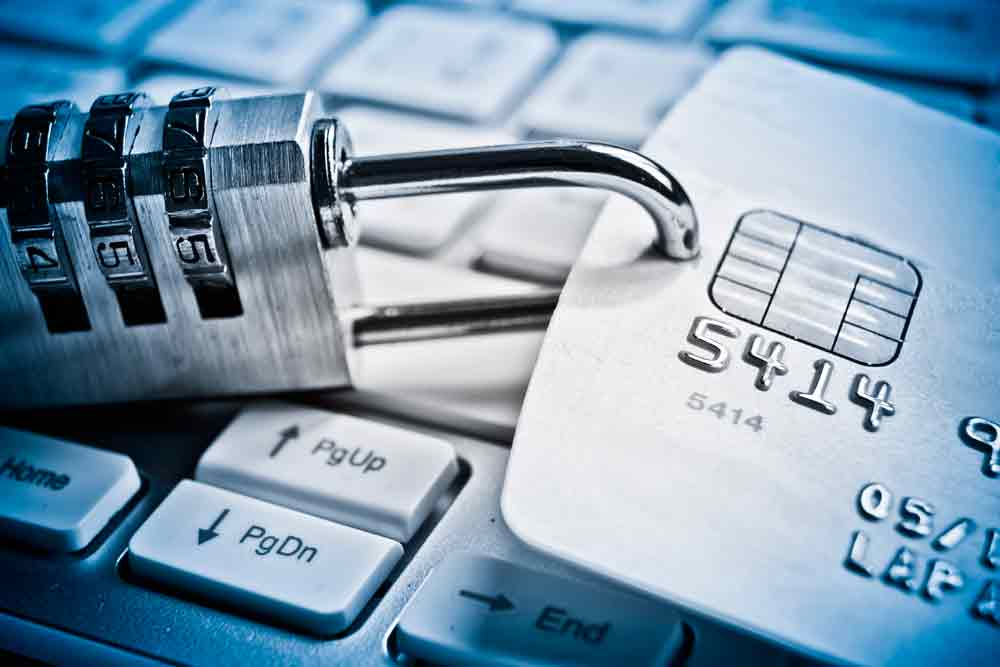


Iremos fazer um projeto de Machine Learning que irá detectar fraudes em cartão de crédito. De acordo com informações o Brasil é o campeão mundial de vazamentos de dados de cartão de crédito, [com 45,4% do total de casos registrados no mundo todo](https://extra.globo.com/economia/brasil-campeao-no-vazamento-de-cartoes-com-454-dos-casos-no-mundo-24861963.html).

Em muitos casos os dados são conseguidos através da engenharia social, que seria por exemplo por click em links falsos, por telefones, o que ajuda muito também a baixar estes índices é tomar algumas precausões, [clique aqui](https://blog.nubank.com.br/golpes-financeiros-como-se-proteger/) para ver estas ações que ajudam a minimizar este problema.

Estes casos de fraudes são prejuisos tanto para o consumidor como para a instituição financeira, por isso temos um grande investimento em Data Science para minimizar cada vez mais estes índices, podemos ver ai que temos grandes oportunidades também para o Data Scientist atuar nestes seguimentos.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de reais e esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

Dito isso vamos ao nosso pojeto!

# Importação dos Dados

Os dados obtidos são de transações financeiras feitas por cartões de créditos de agências européias, são transações realizadas em dois dias onde foram detectados 492 fraudes em 284.807 transações.

Como podemos notar este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro ponto é que as features são todas numéricas, e foram descaracterizadas devido a questões de confidêncialidade, assim os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

[Na página original de onde foi disponibilizado os dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA), sendo elas, as próprias  $[V1, V2, V3 \dots, V28]$, somente a coluna "Time" e "Amount" não passaram por esse processo.


In [4]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [5]:

# importação de todos os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [7]:
#importar dataframe
data_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(data_path)

# Análise Exploratória dos dados

Aqui vou exibir as 5 primeiras entradas para analisar melhor nossos dados.
Aqui podemos notar além da transformação do PCA, conforme já informado anteriormente, a nossa váriavel alvo que é a coluna "Class" que contém a númeração 0 e 1, onde:
 

*   0 é transação normal 
*   1 é transação fraudulenta

Podemos ver também nessa analise exploratória que nosso resumo estátistico não apresenta uma anormalidade, as váriáveis estão com formatos corretos e não há nenhum dado nulo.



In [14]:
#ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
#ver resumo estatístico 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
#ver os formatos (tipos) das váriaveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [17]:
#Verificar os valores unicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64


In [18]:
#ver se há valores nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como já informado anteriormente os dados estão desbalanceados sendo 0.17% do total são transações fraudulentas.

Aqui podemos afirmar isto cientificamente. Na prática, este fator interfere no desempenho do modelo de Machine Learning, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

0    284315
1       492
Name: Class, dtype: int64

 As fraudes representam 0.172749% do dataset.
 


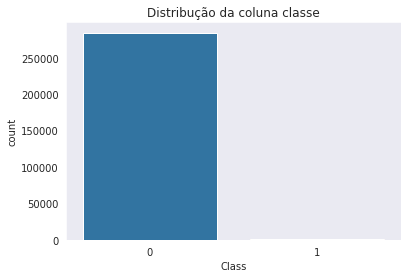

In [21]:
#Calcular e mostrar as quantidades de transações normais (0) e transações fraudulentas (1)
print(df.Class.value_counts())
print("\n As fraudes representam {:4f}% do dataset.\n ".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

#plotar estas informações em um gráfico
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title("Distribução da coluna classe")
plt.show()

Vou plotar dois gráficos para comparar a distribuições de transação normal e fraudulenta ao longo da nossa dimensção tempo que seria a coluna "Time", mas não foi identificado nenhuma informação apartir desta distibuição.

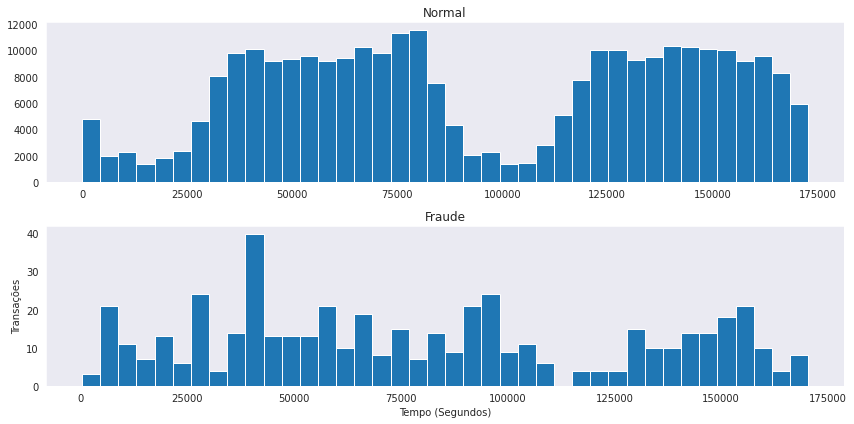

In [24]:
#Configurar plots em duas linhas e 1 coluna e seu tamanho
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

#Definir o gráfico de histograma com a coluna class == 0 (transação normal), seus números de caixas e definir o titulo
ax[0].hist(df.Time[df.Class == 0], bins=40)
ax[0].set_title("Normal")

#Definir o gráfico de histograma com a coluna class == 0 (transação normal), seus números de caixas e definir o titulo
ax[1].hist(df.Time[df.Class == 1], bins=40)
ax[1].set_title("Fraude")

#Plotar uma label no eixo X
plt.xlabel("Tempo (Segundos)")
#Plotar uma label no eixo Y
plt.ylabel("Transações")
#Plotar os gráficos
plt.tight_layout()



Seguindo a análise, vou plotar o boxplots para ver se há diferença nos padrões de transação em relação, agora, a dimensão Amount.

De uma maneira geral, percebe-se uma distribuição diferente para as duas transações, o que provavelmente irá contribuir para o treinamento da Machine Learning.

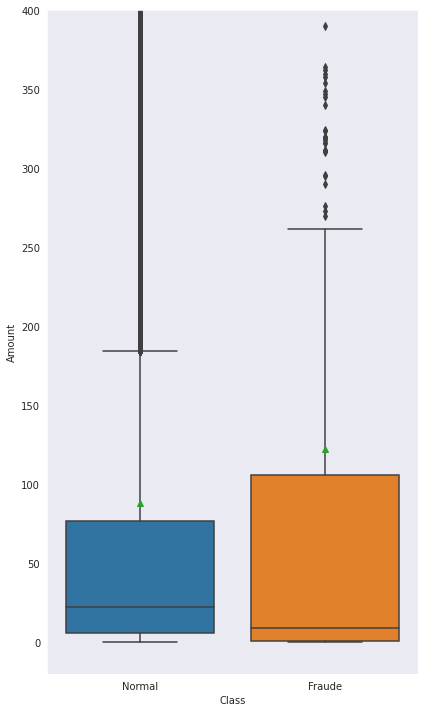

In [32]:
#Configurar o plot, o seu tamanho e o compatilhamento de propriedades no eixo X com o Sharex=True
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

#Informando propriedados do gráfico 
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20,400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

#Plotar gráfico
plt.tight_layout()

Iremos mostrar as informações estátisticas para df.Class == 1 ou seja das transações fraudulentas.

In [36]:
#Mostrando informações estatísticas das transações fraudulentas
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

Agora vamos plotar os gráficos de densidade para vermos as distribuições de cada váriavel para cada transação afim de detectarmos anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Repare que nas variáveis V3, V4, V10 e V11 são bem distintas.

Por outro lado, variáveis como V8, V13 e V15 são similares, apresentando aproximadamente o mesmo comportamento.

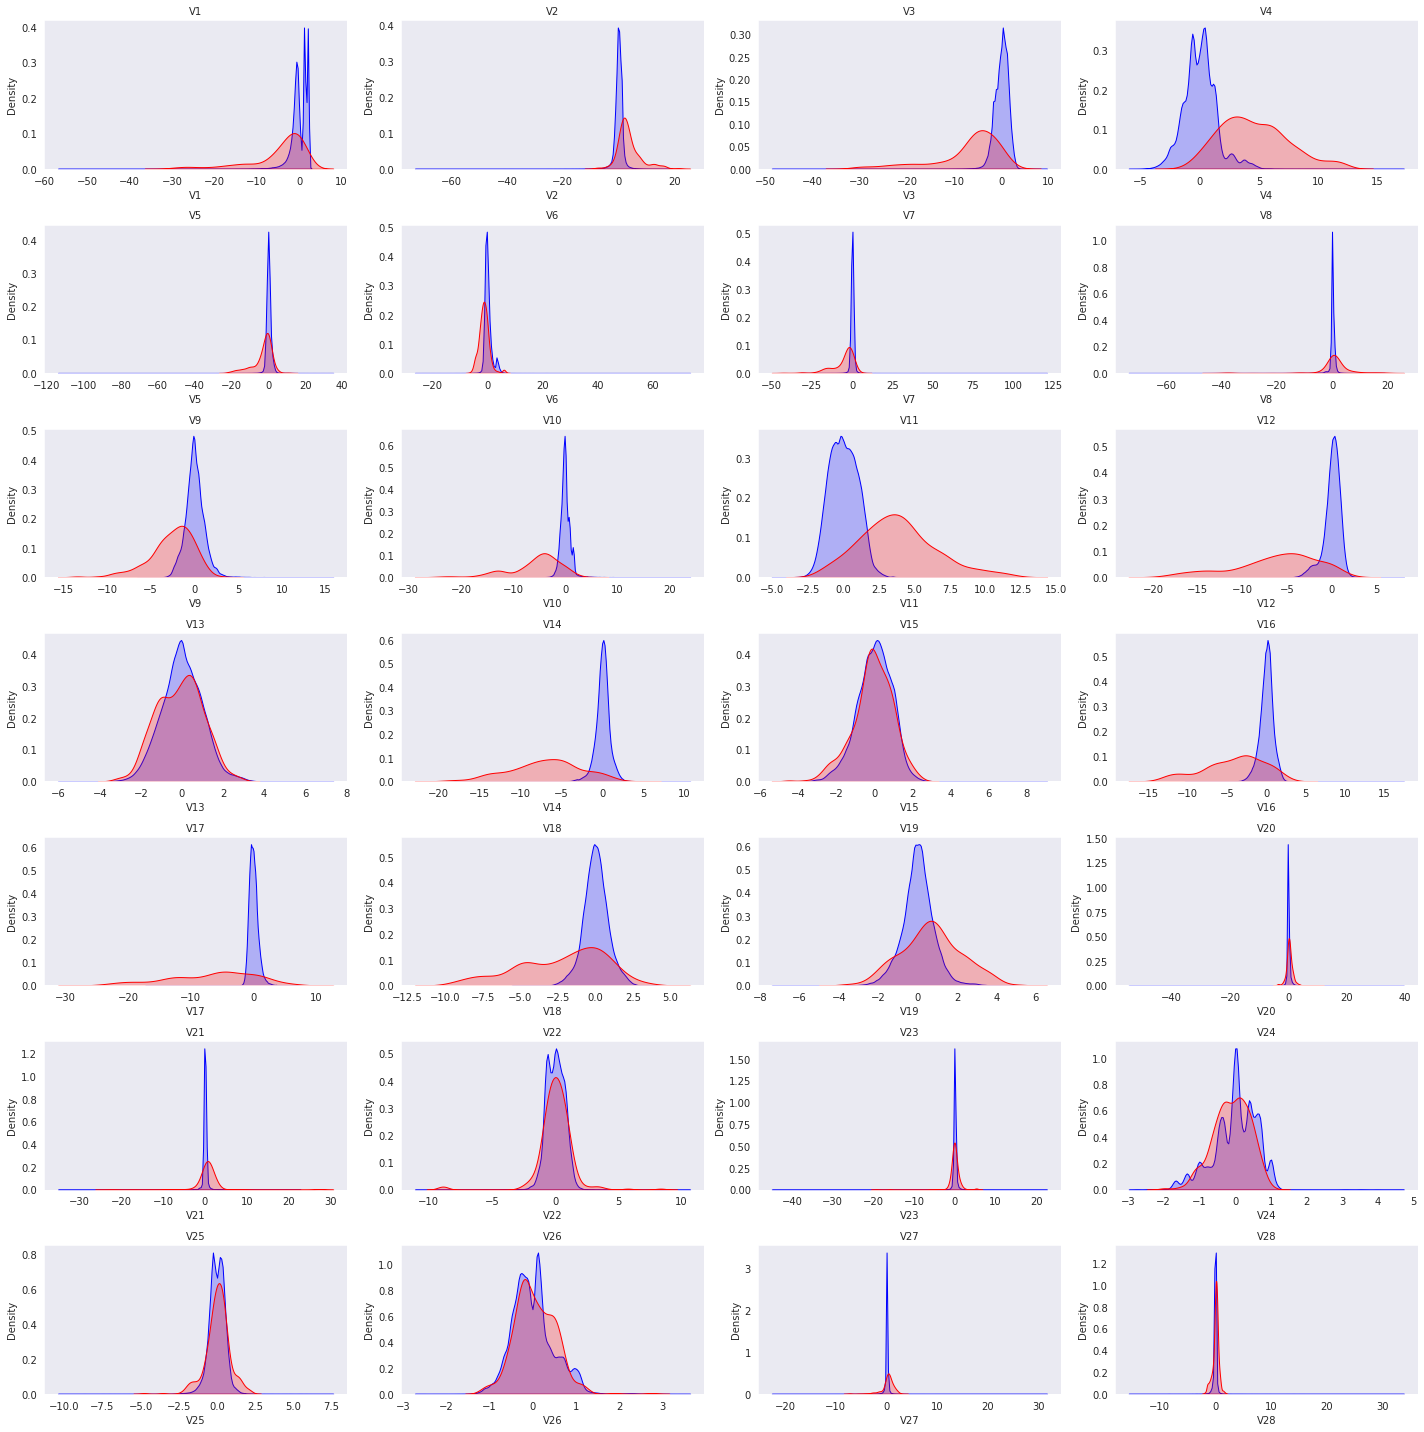

In [37]:
#Separando váriaveos para realizar os calculos e plotar nos gráficos de densidade e dividir a coluna "Class" em dois para vermos o comportamento
#das transações normais(0) e fraudulentas(1)
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

#Configurar os plotes das 28 váriaveis em 7 linhas, 4 colunas e seu tamanho
fig, ax = plt.subplots(nrows = 7, ncols=4, figsize=(20,20))
fig.subplots_adjust(hspace=2, wspace=2)

idx = 0

#Realizar os cálculos e plotar os gráficos
for col in column_names:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color='b')
  sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='r')
  plt.title(col, fontsize=10)
plt.tight_layout()

Podemos resumir então algumas observações principais:



*   O dataset está desbalanceado, podemos afirmar isso quando vemos a porcentagem de transações fraudulentas que representam apenas 0.17%.
*   Ausência de valores nulos.
*   Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as features originais foram padronizadas.
*   As colunas Time e Amount não estão padronizadas.





# Preparar Dados

Para que os dados possam alimentar o modelo que iremos utilizar de Regressão Logística precisamos fazer as seguintes preparações nos dados:



*   Padronizar as features Time e Amount, que estão em outra ordem de grandeza.
*   Dividiremos os dataset entre dados de treino e teste
*   Balancear os dados a fim de evitar uma baixa performance para a classe 1.

In [80]:
#Copiar do dataset em uma váriável
df_clean = df.copy()

#Padronizar as features Time e Amount neste novo dataset
#Uma vez que a coluna Amaount possui outliers, precisamos padronizar pela classe StandardScaler
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as 5 primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Antes de proceder com o balanceamento de dados, devemos dividir os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

In [81]:
#Dividir o dataset entre treino e teste
# separar variáveis entre X e y, X 
X = df_clean.drop("Class", axis=1)
y = df['Class']

# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Usando a biblioteca *imblearn* vamos aplicar as técnicas de balanceamento de dados. No caso, a opção foi usar *Under-sampling*, preservando a classe minoritária.

Podemos ver o resultado nitidamente se compararmos com a discrepância do gráfico plotado no ínicio na análise exploratória.



1    369
0    369
dtype: int64


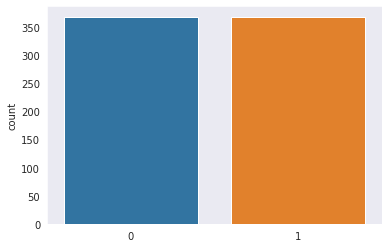

In [82]:
#Balanceamento dos dados
#usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes em números
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição das classes (transação normal e fraudulenta)
sns.countplot(y_rus);

Podemos ver a diferença também, após o balanceamento, que as váriaveis que possuem correlações mais nitidamente.

Podemos observar a diferença quando plotamos na matriz os dados desbalanceados e os dados balanceados, nos desbalanceados, a matriz de correlação não trás informaçãoes relevantes.

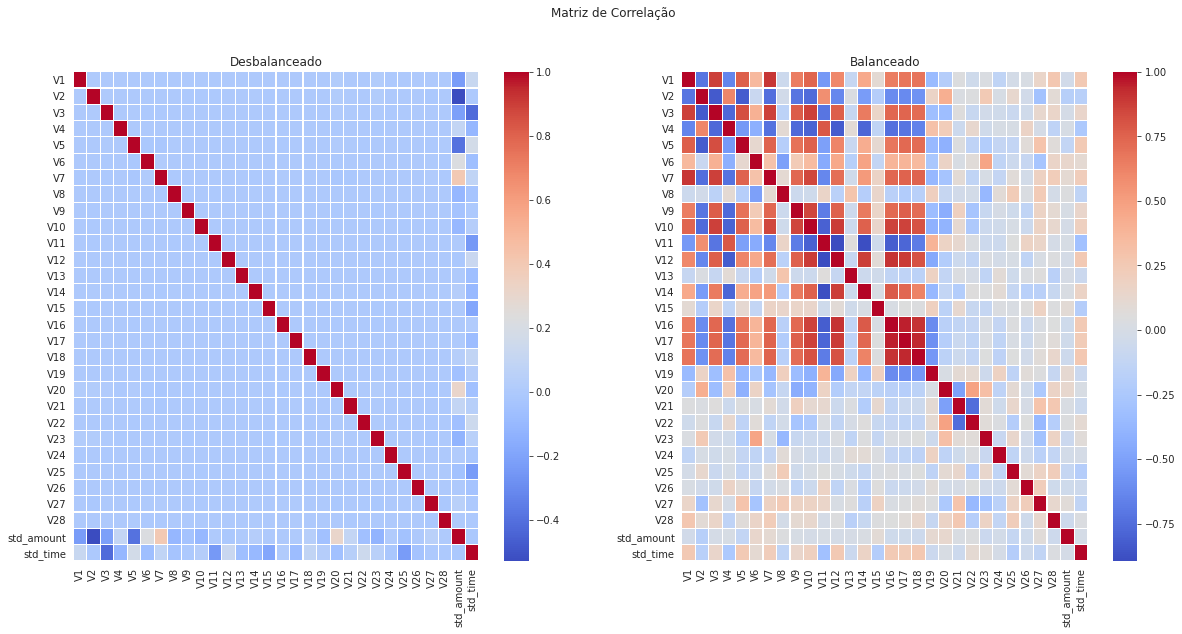

In [83]:
# plotar a matriz de correlação
#dividindo em duas váriaveis os dados dos treinos antes do balanceamento e depois para plotarmos em duas matriz para vermos a diferença
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

#Definido as configurações dos plots, que será em 1 linha, duas colunas, seu tamanho e titul
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20,9))
fig.suptitle("Matriz de Correlação")

#definindo informações do hitmap com o dataset desbalanceado para plotar em seguida
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title("Desbalanceado")

#definindo informações do hitmap com o dataset balanceado para plotar em seguida
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title("Balanceado")

#plotando os gráficos
plt.show()

# Machine Learning

Agora após toda analise exploratória, padronização das colunas "Time" e "Amount", dividir o dataset entre treino e teste e balancear os dados, iremos fazer nosso modelo de machine learning.

In [84]:
#Modelo de machine learning
# instanciar e treinar um modelo de Regressão Logística com o dataset balanceado
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


Com o modelo treinado e as previsões feitas, vamos para a avaliação do desempenho.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada, pois você pode ter uma acurácia extremamente alta mas detectar um número muito baixo de fraudes, podemos ver estes valores (as taxas de acertos) na matriz de confusão, ou também pela coluna Recall da classificação.

Uma outra métrica considerada importante para se avaliar a eficácia é a AUC ROC, ou área sob a curva. No caso desse modelo de Regressão Logística, temos 95% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9684    0.9839     71079
           1     0.0486    0.9350    0.0925       123

    accuracy                         0.9683     71202
   macro avg     0.5243    0.9517    0.5382     71202
weighted avg     0.9982    0.9683    0.9823     71202

Acurácia:0.9683

AUC: 0.9517



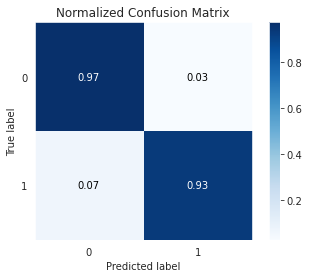

In [85]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia:{:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Chegamos a um bom resultado com uma acurácia de 96% e um AUC de 95% mas claro que há sempre espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar os seus parâmetros.